# INDIA COVID-19 SITUATION REPORT

### About

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV).

Coronavirus disease (COVID-19) is a new strain that was discovered in 2019 and has not been previously identified in humans.

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

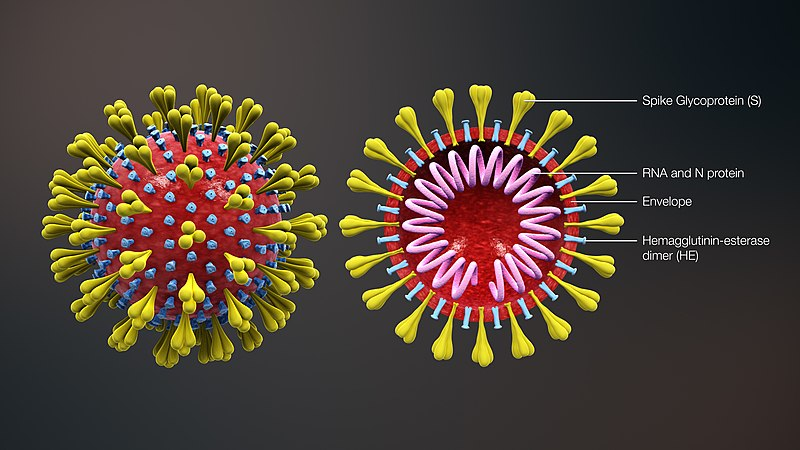

In [1]:
from IPython.core.display import Image, display
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/3D_medical_animation_corona_virus.jpg/800px-3D_medical_animation_corona_virus.jpg', width=800, unconfined=True))

### Context

From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. Data is extracted from the google sheets associated and made available here.

### Content

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [2]:
import os
os.chdir(r'G:\AAIC\AAIC\AAIC Assignment\CORONA\India corona\India_corona_29_march')

In [3]:
# IMPORTING SOME LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
# from datetime import datetime, date

plt.style.use('seaborn')
%matplotlib inline

In [4]:
# IMPORTING SOME LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier

plt.style.use('seaborn')
%matplotlib inline



import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# 1. DATA CLEANING & UNDERSTANDING

In [5]:
df = pd.read_csv('covid_19_india.csv')
print('Shape of the data:', pd.read_csv('covid_19_india.csv').shape)
df['Total_confirm'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']

# spelling mistake of Chhattisgarh
for i in range(0, len(df['State/UnionTerritory'])):
    if df['State/UnionTerritory'][i] == 'Chattisgarh':
        temp_i = i
temp_i
df.drop(temp_i, inplace=True)
df.reset_index(inplace=True)

df.head()

Shape of the data: (473, 8)


,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_confirm
0,0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


# 2. CREATE CONFIRM DATA FRAME: `df_confirm`

In [6]:
# In this code I am trying to make a table where the dates are in the columns (Increasing format)
# Rows will be my state where it shows me the number of confirm cases or death cases or cured cases

df_confirm = pd.DataFrame(index=list(df['Date']) ,columns=list(df['State/UnionTerritory'])).T
print(df_confirm.shape)
df_confirm.head(3)

(472, 472)


,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20
Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
confirm = list(df['Total_confirm'])
for i,j in zip([i for i in range(0, len(list(df_confirm.keys()))+1)], confirm):
    df_confirm.iloc[i][i] = j
    
df_confirm.head()

,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20
Kerala,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 FILL THE `NaN` VALUES AS `0`

In [8]:
df_confirm.fillna(0, inplace=True)
df_confirm.head()

,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20,29/03/20
Kerala,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 COMBINE ALL SIMMILAR DATES:

In [9]:
df_confirm = df_confirm.groupby(axis=1, level=0).sum()
df_confirm.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,28/03/20,29/02/20,29/03/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Kerala,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_confirm['27/03/20'].sum()

724

# 3. CREATE DEATH DATAFRAME: `df_death`

In [11]:
df_death = pd.DataFrame(index=list(df['Date']) ,columns=list(df['State/UnionTerritory'])).T


# Death details entry to the empty dataframe
death = list(df['Deaths'])
for i,j in zip([i for i in range(0, len(list(df_death.keys()))+1)], death):
    df_death.iloc[i][i] = j
    
    
# fill the NaN value as 0
df_death.fillna(0, inplace=True)
# df_death.head()


# Combine all the similar dataes:
df_death = df_death.groupby(axis=1, level=0).sum()
df_death.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,28/03/20,29/02/20,29/03/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. CREATE  CURED DATAFRAME: `df_cured`

In [12]:
# create new data frame df_cured
df_cured = pd.DataFrame(index=list(df['Date']) ,columns=list(df['State/UnionTerritory'])).T
# print(df_cured.shape)
# df_cured.head(3)


# cured details entry to the empty dataframe
cured = list(df['Cured'])
for i,j in zip([i for i in range(0, len(list(df_cured.keys()))+1)], cured):
    df_cured.iloc[i][i] = j
    
# df_cured.head()



# fill the NaN value as 0
df_cured.fillna(0, inplace=True)
# df_cured.head()



# Combine all the similar dataes:
df_cured = df_cured.groupby(axis=1, level=0).sum()
df_cured.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,28/03/20,29/02/20,29/03/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. FOR ANALYSIS

In [13]:
dates = list(df['Date'].unique())
india_confirm_cases = []
india_death_cases = []
india_mortality_rate = []
india_recovery_rate = []
total_recovered = []
total_active = []
for i in dates:
    confirm_sum = df_confirm[i].sum()
    death_sum = df_death[i].sum()
    recovery_sum = df_cured[i].sum()
    india_confirm_cases.append(confirm_sum)
    india_death_cases.append(death_sum)
    india_mortality_rate.append(death_sum / confirm_sum)
    india_recovery_rate.append(recovery_sum / confirm_sum)
    total_recovered.append(recovery_sum)
    total_active.append(confirm_sum - death_sum - recovery_sum)

# 6. CONFIRM CASES DATE WISE:

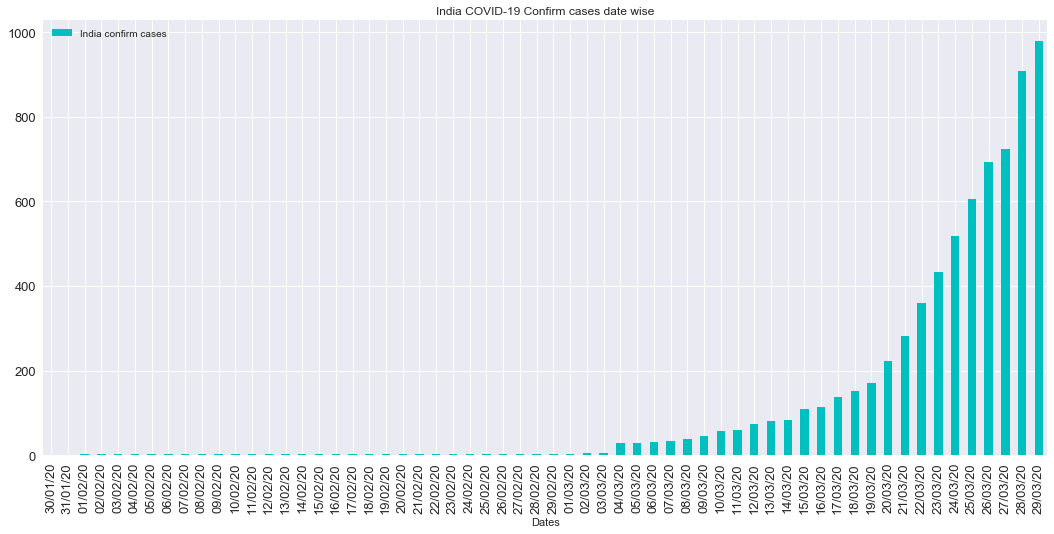

In [14]:
import operator

plt.rcParams['figure.figsize'] = (18,8)
bar_df = pd.DataFrame({'Dates':dates[0:], 'India confirm cases':india_confirm_cases[0:]})

bar_df.plot.bar(x='Dates', y='India confirm cases', rot=90, color='c', title='India COVID-19 Confirm cases date wise', fontsize=13)

# 7. CONFIRM & DEATH LAST MONTH

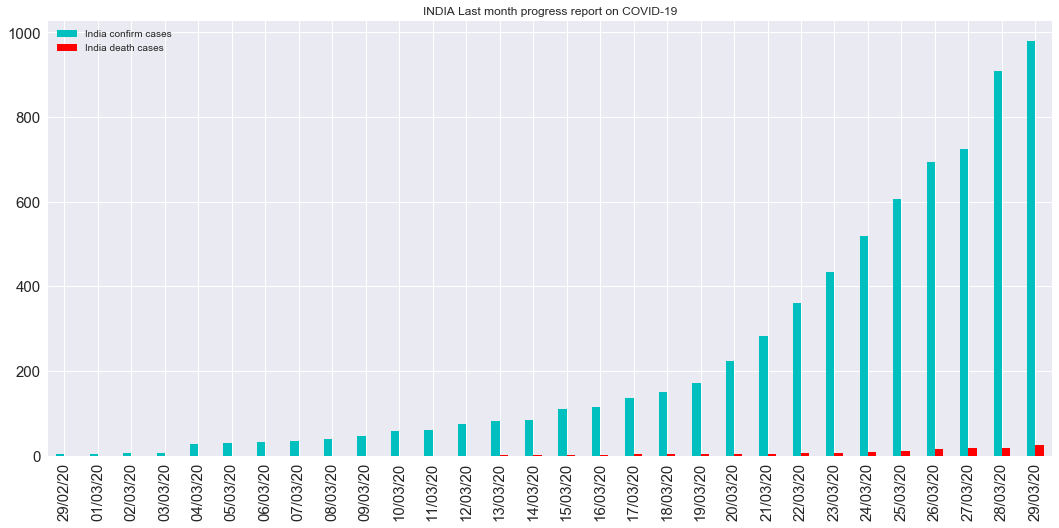

In [15]:
confirm_cases = india_confirm_cases[-30:]
death_cases = india_death_cases[-30:]
index = dates[-30:]
df = pd.DataFrame({'India confirm cases': confirm_cases,
                   'India death cases': death_cases}, index=index)
ax = df.plot.bar(color=['c', 'r'], title='INDIA Last month progress report on COVID-19', fontsize=15)

# 8. CONFIRM & DEATH LAST 5 DAYS

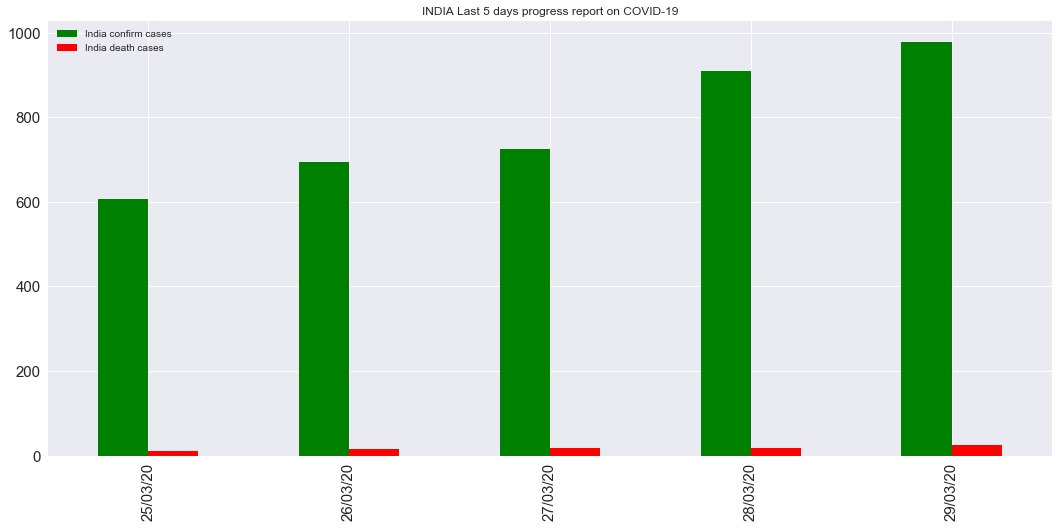

In [16]:
confirm_cases = india_confirm_cases[-5:]
death_cases = india_death_cases[-5:]
index = dates[-5:]
df = pd.DataFrame({'India confirm cases': confirm_cases,
                   'India death cases': death_cases}, index=index)
ax = df.plot.bar(color=['g', 'r'], title='INDIA Last 5 days progress report on COVID-19', fontsize=15)

# 9. INDIA: `+VE` VS `RECOVERY` VS `DEATH`

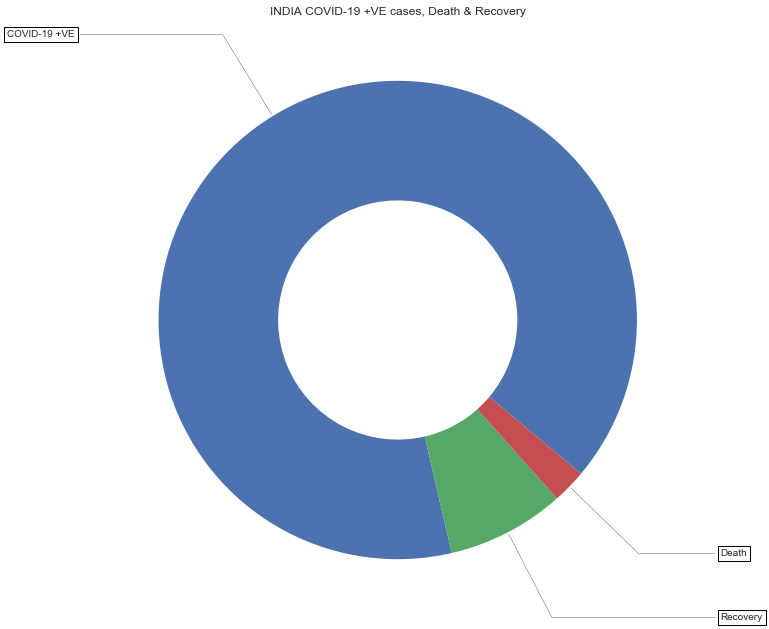

In [17]:
fig, ax = plt.subplots(figsize=(22, 11), subplot_kw=dict(aspect="equal"))

recipe = ['COVID-19 +VE', 'Recovery', 'Death']

data = [india_confirm_cases[-1], total_recovered[-1], india_death_cases[-1]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("INDIA COVID-19 +VE cases, Death & Recovery")

plt.show()

# 10. INDIA LINE GRAPH

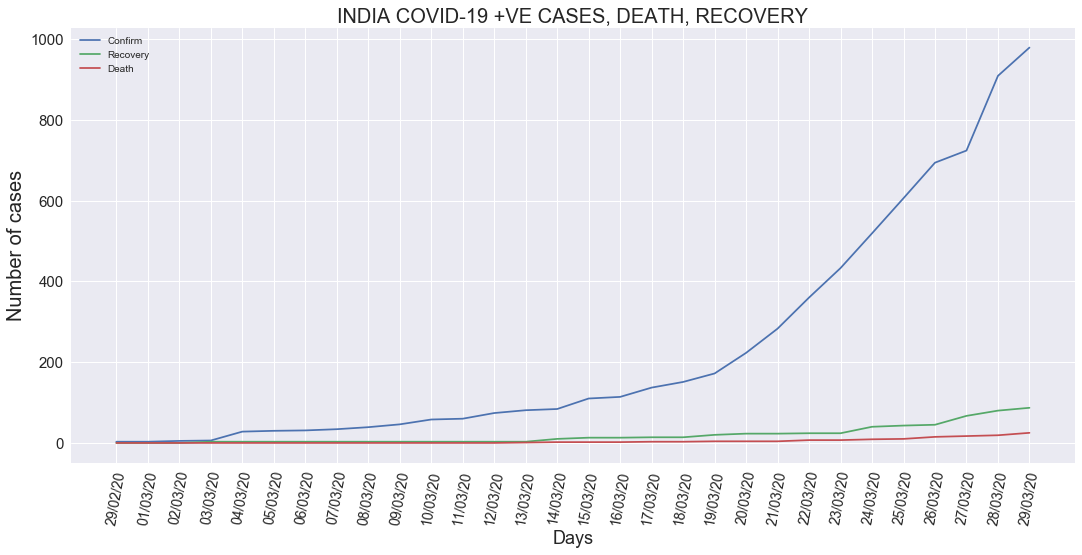

In [18]:
plt.figure(figsize=(18,8))
plt.plot(dates[-30:], india_confirm_cases[-30:])
plt.plot(dates[-30:], total_recovered[-30:])
plt.plot(dates[-30:], india_death_cases[-30:])
plt.title('INDIA COVID-19 +VE CASES, DEATH, RECOVERY', size=20)
plt.xlabel('Days', size=18)
plt.ylabel('Number of cases', size=20)
plt.legend(['Confirm', 'Recovery', 'Death'])
plt.xticks(size=20, rotation=80, fontsize=14)
plt.yticks(size=15)
plt.show()

# 11. STATE WISE ANALYSIS

In [19]:
df = pd.read_csv('covid_19_india.csv')

# Create another sate dataframe for state wise analysis
state_confirm_df = df_confirm.copy()
state_death_df = df_death.copy()
state_recovery_df = df_cured.copy()

# Combine sate rows in a single row
state_confirm_df = state_confirm_df.groupby(axis=0, level=0).sum()
state_death_df = state_death_df.groupby(axis=0, level=0).sum()
state_recovery_df = state_recovery_df.groupby(axis=0, level=0).sum()

states = sorted(list(state_confirm_df.index))

In [20]:
state_confirm = []
state_death = []
state_recovery = []

for i in states:
    a = state_confirm_df.loc[i][list(df['Date'])[-1]]
    b = state_death_df.loc[i][list(df['Date'])[-1]]
    c = state_recovery_df.loc[i][list(df['Date'])[-1]]
    state_confirm.append(a)
    state_death.append(b)
    state_recovery.append(c)

In [21]:
state_confirm_dict = dict(sorted(dict(zip(states, state_confirm)).items(), key=operator.itemgetter(1), reverse=True))

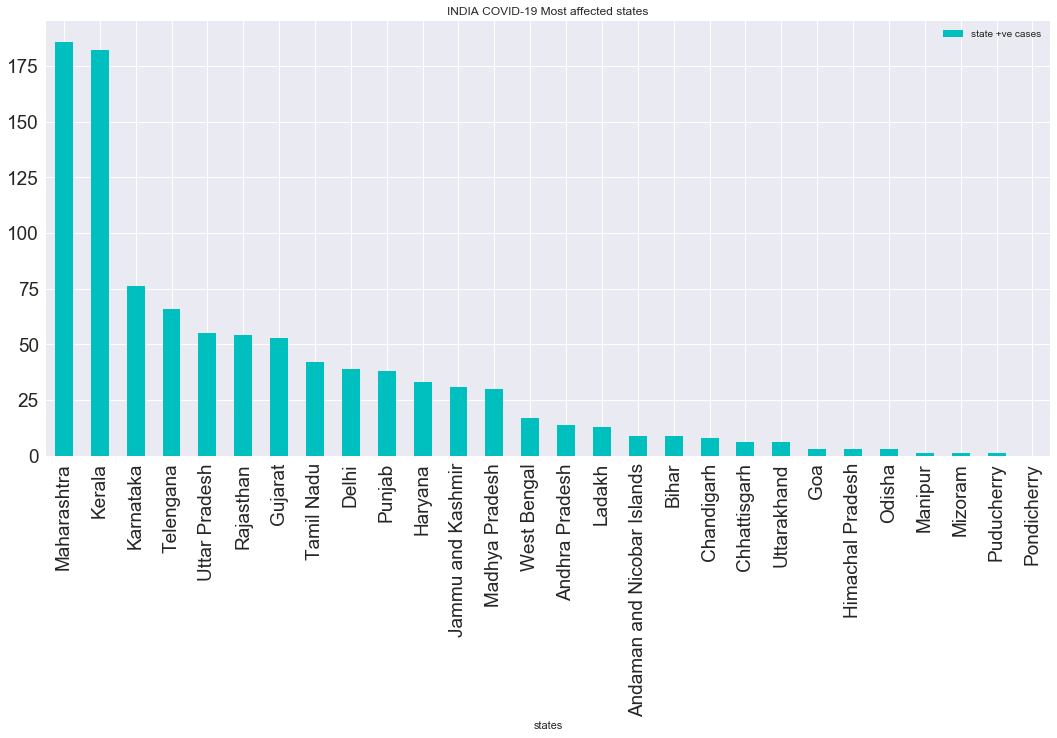

In [22]:
import operator

plt.rcParams['figure.figsize'] = (18,8)
bar_df = pd.DataFrame({'states':list(state_confirm_dict.keys())[0:], \
                       'state +ve cases':list(state_confirm_dict.values())[0:]})

bar_df.plot.bar(x='states', y='state +ve cases', rot=90, color='c', title='INDIA COVID-19 Most affected states', fontsize=19)

# 12. FUTURE PREDICTION: `SVR`

In [23]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)

print(len(future_forecast), ': Length of future_forecast')

adjusted_dates = future_forecast[:-10]

70 : Length of future_forecast


In [24]:
start = '30/01/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [25]:
day_since_30_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

In [26]:
x_train_confirm, x_test_confirm, y_train_confirm, y_test_confirm = train_test_split(day_since_30_1, india_confirm_cases, \
                                                                                    test_size=0.02, shuffle=False)

In [27]:
# from sklearn.model_selection import RandomizedSearchCV

# kernel = ['poly', 'sigmoid', 'rbf']
# c = [0.01, 0.1, 1, 10]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [2, 3, 4, 5, 6, 7, 8]
# svm_grid = {'shrinking' : shrinking, 'kernel' : kernel, 'gamma' : gamma, 'epsilon' : epsilon, 'C' : c, 'degree' : degree}


# svm = SVR()
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='r2', cv=3, return_train_score=True, n_jobs=-1, \
#                                n_iter=40, verbose=1)
# svm_search.fit(x_train_confirm, y_train_confirm)






# svm_search.best_params_




# svm_model = svm_search.best_estimator_

In [47]:
svm_model = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=8, C=0.1)
svm_model.fit(x_train_confirm, y_train_confirm)

# svm_model = svm_search.best_estimator_

svm_test_pred = svm_model.predict(x_test_confirm)
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirm))
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirm))
print('R^2:', r2_score(svm_test_pred, y_test_confirm))

MSE: 5253.5236436732175
MAE: 68.18308452468602
R^2: -0.4795405845267935


In [48]:
future_svm_pred = svm_model.predict(future_forecast)

In [49]:
last_dates = future_forecast_dates[-10:]

30/03/2020 : 1070
31/03/2020 : 1220
01/04/2020 : 1390
02/04/2020 : 1579
03/04/2020 : 1790
04/04/2020 : 2026
05/04/2020 : 2289
06/04/2020 : 2582
07/04/2020 : 2906
08/04/2020 : 3266


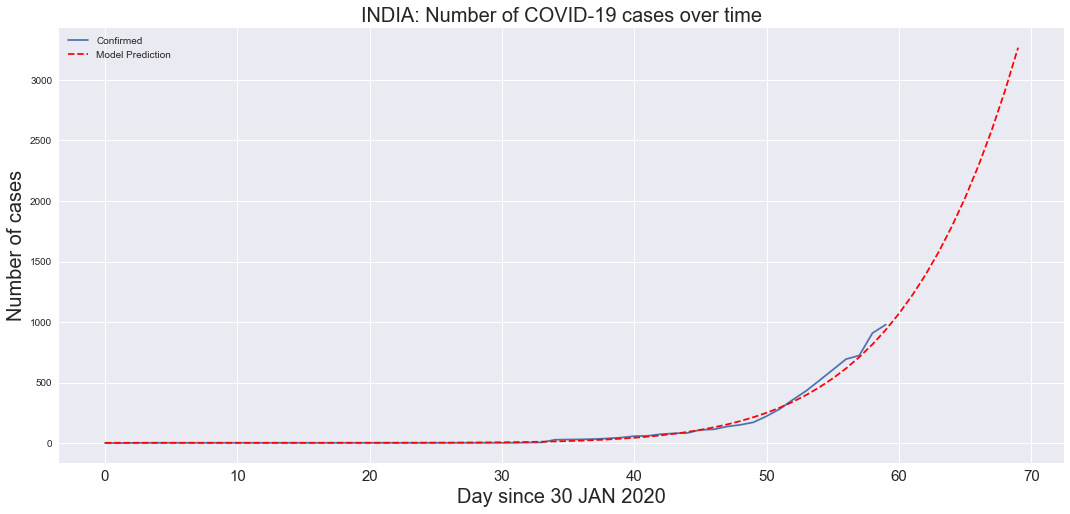

In [50]:
last_pred = list(future_svm_pred)[-10:]
last_pred_list = [int(round(i)) for i in last_pred]
for i, j in zip(last_dates, last_pred_list):
    print(i, ':', j)


plt.figure(figsize=(18,8))
plt.plot(adjusted_dates, india_confirm_cases)
plt.plot(future_forecast, future_svm_pred, linestyle='dashed', color='red')
plt.title('INDIA: Number of COVID-19 cases over time', size=20)
plt.xlabel('Day since 30 JAN 2020', size=20)
plt.ylabel('Number of cases', size=20)
plt.legend(['Confirmed', 'Model Prediction'])
plt.xticks(size=15)
plt.show()

# 13. INDIA COVID-19 FUTURE PREDICTION DATE WISE

In [51]:
temp_dict = dict(zip(last_dates, last_pred_list))

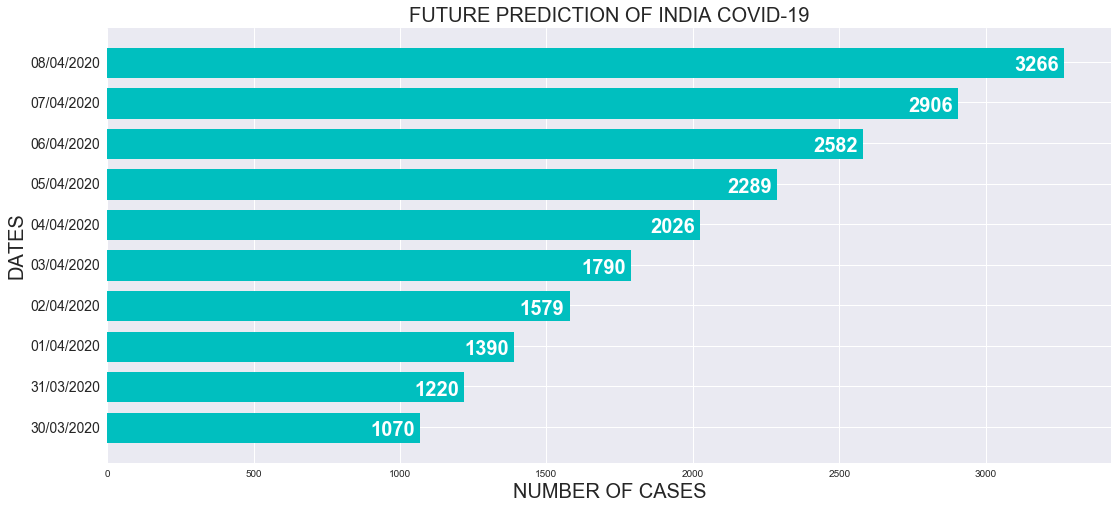

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = list(temp_dict.keys())
y = list(temp_dict.values())

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="c")
ax.set_yticks(ind+width/30)
ax.set_yticklabels(x, minor=False, fontsize=14)

plt.title('FUTURE PREDICTION OF INDIA COVID-19', fontsize=20)
plt.xlabel('NUMBER OF CASES', fontsize=20)
plt.ylabel('DATES', fontsize=20)      
#plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight', color='c') 

for i, v in enumerate(y):
    ax.text(v + -170, i + -0.2, str(v), color='w', fontweight='bold', fontsize=20)

# 14. INDIA COVID-19 FUTURE PREDICTION WEEKLY

In [56]:
future_forecast_dates
future_prediction  = [int(round(future_svm_pred[i])) for i in range(len(future_svm_pred))]

In [57]:
weeks = future_forecast_dates[0::7][-5:]
weeks_report = future_prediction[0::7][-5:]

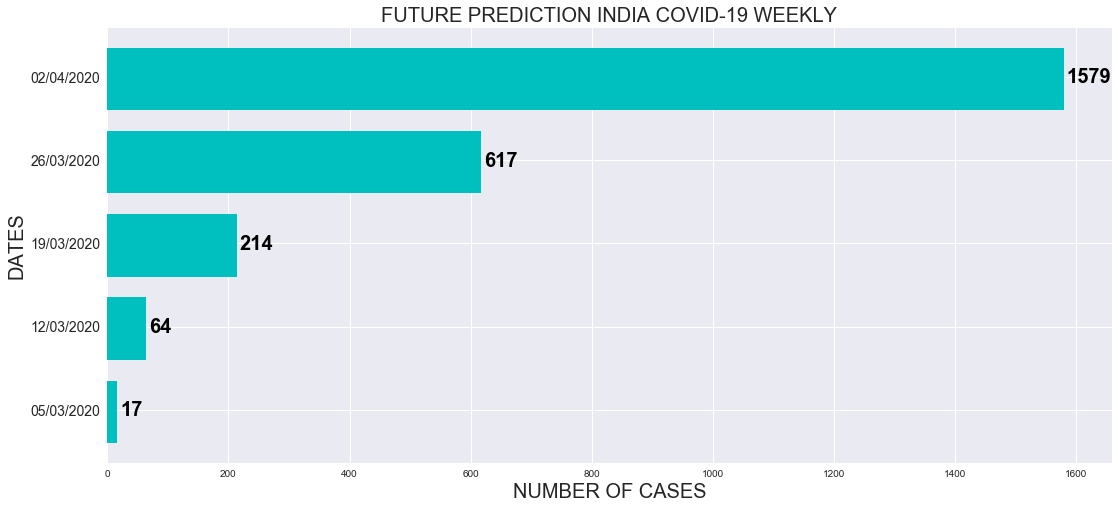

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = weeks
y = weeks_report

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="c")
ax.set_yticks(ind+width/30)
ax.set_yticklabels(x, minor=False, fontsize=14)

plt.title('FUTURE PREDICTION INDIA COVID-19 WEEKLY', fontsize=20)
plt.xlabel('NUMBER OF CASES', fontsize=20)
plt.ylabel('DATES', fontsize=20)      
#plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight', color='c') 

for i, v in enumerate(y):
    ax.text(v + 5, i + -0.05, str(v), color='k', fontweight='bold', fontsize=20)

# THANK YOU